In [24]:
import gc
import sys

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [26]:
sys.path.append('..')
gc.enable()

# 1章ニューラルネットワークの復習

## 数学とpythonの復習

## ニューラルネットワークの推論

## ニューラルネットワークの学習

## ニューラルネットワークで問題を解く

### スパイラル・データセット

In [4]:
from dataset import spiral

In [5]:
x, t = spiral.load_data()

In [6]:
x.shape

(300, 2)

In [7]:
t.shape

(300, 3)

57

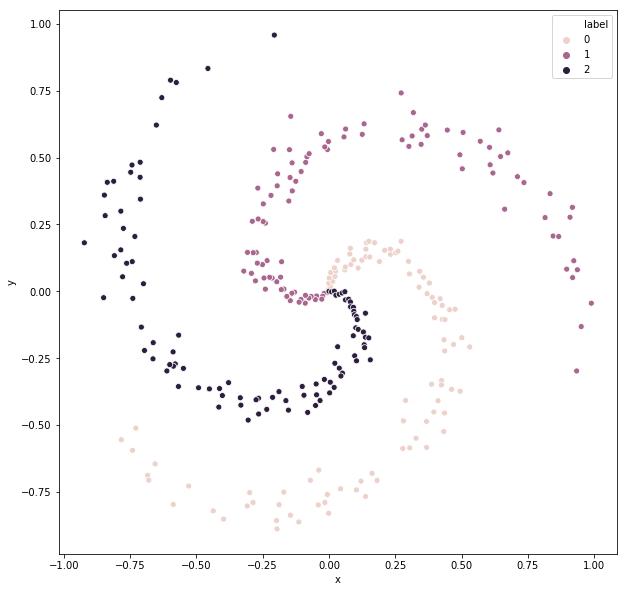

In [27]:
tmp = pd.DataFrame(x, columns=['x', 'y'])
tmp['label'] = np.argmax(t, axis=1)

fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(data=tmp, x='x', y='y', hue='label', ax=ax)
del tmp
gc.collect()

### ニューラルネットワークの実装

In [28]:
from common.layers import Affine, Sigmoid, SoftmaxWithLoss

In [50]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size):
        I, H, O = input_size, hidden_size, output_size
        
        # 重みとバイアスの初期化
        W1 = 0.01 * np.random.randn(I, H)
        b1 = np.zeros(H)
        W2 = 0.01 * np.random.randn(H, O)
        b2 = np.zeros(O)
        
        # レイヤの生成
        self.layers = [
            Affine(W1, b1),
            Sigmoid(),
            Affine(W2, b2)
        ]
        self.loss_layer = SoftmaxWithLoss()
        
        # すべての重みと勾配をリストにまとめる
        self.params, self.grads = [], []
        for layer in self.layers:
            self.params += layer.params
            self.grads += layer.grads
    
    def predict(self, x):
        for layer in self.layers:
            x = layer.forward(x)
        return x
    
    def forward(self, x, t):
        score = self.predict(x)
        loss = self.loss_layer.forward(score, t)
        return loss
    
    def backward(self, dout=1):
        dout = self.loss_layer.backward(dout)
        for layer in reversed(self.layers):
            dout = layer.backward(dout)
        return dout

### 学習用のソースコード

In [33]:
from common.optimizer import SGD

In [35]:
# ハイパーパラメータの設定
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

In [54]:
# データの読み込み,モデルとオプティマイザの生成
x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

# 学習で使用する変数
data_size = len(x)
max_iters = data_size // batch_size
total_loss = 0
loss_count = 0
loss_list = []

for epoch in range(max_epoch):
    idx = np.random.permutation(data_size)
    x = x[idx]
    t = t[idx]
    
    for iters in range(max_iters):
        batch_x = x[iters*batch_size: (iters+1)*batch_size]
        batch_t = t[iters*batch_size: (iters+1)*batch_size]
        
        # 勾配を求め,パラメーターを更新
        loss = model.forward(batch_x, batch_t)
        model.backward()
        optimizer.update(model.params, model.grads)
        
        total_loss += loss
        loss_count += 1
        
        # 定期的に学習経過を出力
        if (iters+1) % 10 == 0:
            avg_loss = total_loss / loss_count
            print(f'| epoch {epoch + 1: >2d} | iter {iters + 1: d} / {max_iters: d} | loss {avg_loss:.2f}')
            loss_list.append(avg_loss)
            total_loss, loss_count = 0, 0

| epoch  1 | iter  10 /  10 | loss 1.13
| epoch  2 | iter  10 /  10 | loss 1.13
| epoch  3 | iter  10 /  10 | loss 1.12
| epoch  4 | iter  10 /  10 | loss 1.12
| epoch  5 | iter  10 /  10 | loss 1.11
| epoch  6 | iter  10 /  10 | loss 1.14
| epoch  7 | iter  10 /  10 | loss 1.16
| epoch  8 | iter  10 /  10 | loss 1.11
| epoch  9 | iter  10 /  10 | loss 1.12
| epoch 10 | iter  10 /  10 | loss 1.13
| epoch 11 | iter  10 /  10 | loss 1.12
| epoch 12 | iter  10 /  10 | loss 1.11
| epoch 13 | iter  10 /  10 | loss 1.09
| epoch 14 | iter  10 /  10 | loss 1.08
| epoch 15 | iter  10 /  10 | loss 1.04
| epoch 16 | iter  10 /  10 | loss 1.03
| epoch 17 | iter  10 /  10 | loss 0.96
| epoch 18 | iter  10 /  10 | loss 0.92
| epoch 19 | iter  10 /  10 | loss 0.92
| epoch 20 | iter  10 /  10 | loss 0.87
| epoch 21 | iter  10 /  10 | loss 0.85
| epoch 22 | iter  10 /  10 | loss 0.82
| epoch 23 | iter  10 /  10 | loss 0.79
| epoch 24 | iter  10 /  10 | loss 0.78
| epoch 25 | iter  10 /  10 | loss 0.82


| epoch 246 | iter  10 /  10 | loss 0.13
| epoch 247 | iter  10 /  10 | loss 0.13
| epoch 248 | iter  10 /  10 | loss 0.13
| epoch 249 | iter  10 /  10 | loss 0.13
| epoch 250 | iter  10 /  10 | loss 0.13
| epoch 251 | iter  10 /  10 | loss 0.13
| epoch 252 | iter  10 /  10 | loss 0.12
| epoch 253 | iter  10 /  10 | loss 0.12
| epoch 254 | iter  10 /  10 | loss 0.12
| epoch 255 | iter  10 /  10 | loss 0.12
| epoch 256 | iter  10 /  10 | loss 0.12
| epoch 257 | iter  10 /  10 | loss 0.12
| epoch 258 | iter  10 /  10 | loss 0.12
| epoch 259 | iter  10 /  10 | loss 0.13
| epoch 260 | iter  10 /  10 | loss 0.12
| epoch 261 | iter  10 /  10 | loss 0.13
| epoch 262 | iter  10 /  10 | loss 0.12
| epoch 263 | iter  10 /  10 | loss 0.12
| epoch 264 | iter  10 /  10 | loss 0.13
| epoch 265 | iter  10 /  10 | loss 0.12
| epoch 266 | iter  10 /  10 | loss 0.12
| epoch 267 | iter  10 /  10 | loss 0.12
| epoch 268 | iter  10 /  10 | loss 0.12
| epoch 269 | iter  10 /  10 | loss 0.11
| epoch 270 | it

Text(0, 0.5, 'loss')

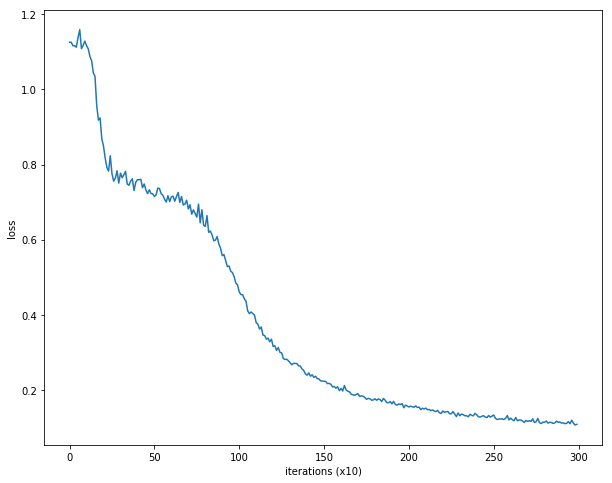

In [60]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.plot(np.arange(len(loss_list)), loss_list, label='train')
ax.set_xlabel('iterations (x10)')
ax.set_ylabel('loss')

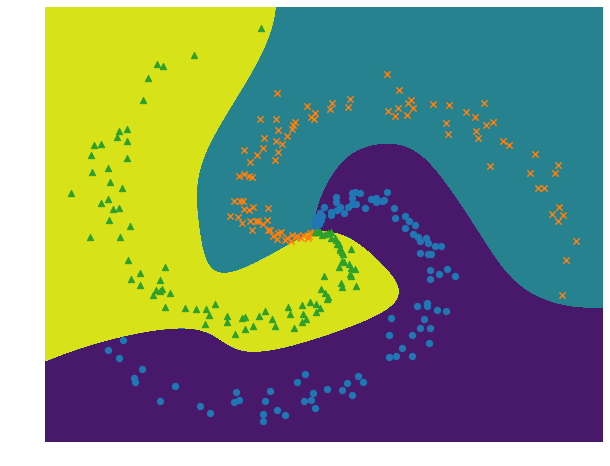

In [64]:
# 境界領域のプロット
h = 0.001
x_min, x_max = x[:, 0].min() - .1, x[:, 0].max() + .1
y_min, y_max = x[:, 1].min() - .1, x[:, 1].max() + .1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
X = np.c_[xx.ravel(), yy.ravel()]
score = model.predict(X)
predict_cls = np.argmax(score, axis=1)
Z = predict_cls.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(10, 8))
ax.contourf(xx, yy, Z)
ax.axis('off')

x, t = spiral.load_data()
N = 100
CLS_NUM = 3
markers = ['o', 'x', '^']
for i in range(CLS_NUM):
    ax.scatter(x[i*N:(i+1)*N, 0], x[i*N:(i+1)*N, 1], s=40, marker=markers[i])

### Trainerクラス

In [65]:
from common.optimizer import SGD
from common.trainer import Trainer
from dataset import spiral

In [66]:
max_epoch = 300
batch_size = 30
hidden_size = 10
learning_rate = 1.0

In [67]:
x, t = spiral.load_data()
model = TwoLayerNet(input_size=2, hidden_size=hidden_size, output_size=3)
optimizer = SGD(lr=learning_rate)

In [68]:
trainer = Trainer(model, optimizer)
trainer.fit(x, t, max_epoch, batch_size, eval_interval=10)

| epoch 1 |  iter 1 / 10 | time 0[s] | loss 1.10
| epoch 2 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 3 |  iter 1 / 10 | time 0[s] | loss 1.13
| epoch 4 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 5 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 6 |  iter 1 / 10 | time 0[s] | loss 1.10
| epoch 7 |  iter 1 / 10 | time 0[s] | loss 1.14
| epoch 8 |  iter 1 / 10 | time 0[s] | loss 1.16
| epoch 9 |  iter 1 / 10 | time 0[s] | loss 1.11
| epoch 10 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 11 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 12 |  iter 1 / 10 | time 0[s] | loss 1.12
| epoch 13 |  iter 1 / 10 | time 0[s] | loss 1.10
| epoch 14 |  iter 1 / 10 | time 0[s] | loss 1.09
| epoch 15 |  iter 1 / 10 | time 0[s] | loss 1.08
| epoch 16 |  iter 1 / 10 | time 0[s] | loss 1.04
| epoch 17 |  iter 1 / 10 | time 0[s] | loss 1.03
| epoch 18 |  iter 1 / 10 | time 0[s] | loss 0.94
| epoch 19 |  iter 1 / 10 | time 0[s] | loss 0.92
| epoch 20 |  iter 1 / 10 | time 0[s] | loss 0.92
| epoch 2

| epoch 168 |  iter 1 / 10 | time 0[s] | loss 0.19
| epoch 169 |  iter 1 / 10 | time 0[s] | loss 0.18
| epoch 170 |  iter 1 / 10 | time 0[s] | loss 0.19
| epoch 171 |  iter 1 / 10 | time 0[s] | loss 0.19
| epoch 172 |  iter 1 / 10 | time 0[s] | loss 0.20
| epoch 173 |  iter 1 / 10 | time 0[s] | loss 0.16
| epoch 174 |  iter 1 / 10 | time 0[s] | loss 0.20
| epoch 175 |  iter 1 / 10 | time 0[s] | loss 0.18
| epoch 176 |  iter 1 / 10 | time 0[s] | loss 0.17
| epoch 177 |  iter 1 / 10 | time 0[s] | loss 0.17
| epoch 178 |  iter 1 / 10 | time 0[s] | loss 0.17
| epoch 179 |  iter 1 / 10 | time 0[s] | loss 0.18
| epoch 180 |  iter 1 / 10 | time 0[s] | loss 0.19
| epoch 181 |  iter 1 / 10 | time 0[s] | loss 0.17
| epoch 182 |  iter 1 / 10 | time 0[s] | loss 0.18
| epoch 183 |  iter 1 / 10 | time 0[s] | loss 0.16
| epoch 184 |  iter 1 / 10 | time 0[s] | loss 0.18
| epoch 185 |  iter 1 / 10 | time 0[s] | loss 0.18
| epoch 186 |  iter 1 / 10 | time 0[s] | loss 0.17
| epoch 187 |  iter 1 / 10 | ti

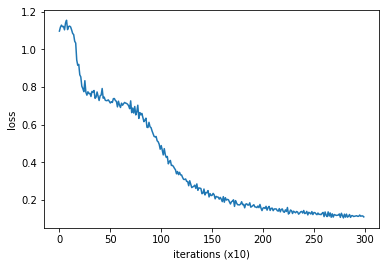

In [69]:
trainer.plot()

## 計算の高速化

省略